In [1]:
import geopandas as gpd # https://geopandas.org/en/v0.14.4/docs/user_guide/mapping.html

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
"""FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))"""

'FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original \'naturalearth_lowres\' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.\nworld = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))'

In [3]:
# Define colors
OFF_BLACK = '#05050e'
OFF_WHITE = '#f3f1ec'
SPINE_COLOR = [0.25, 0.25, 0.35]
GRID_COLOR = [0.75] * 3
TICK_COLOR = [0.3] * 3

def set_plt_defaults(figsize=(12, 7), left=0.10, top=0.88, right=0.95, bottom=0.13, grid_on=True):
    """Set default matplotlib styling."""
    plt.rcParams.update({
        'figure.figsize': figsize,
        'figure.subplot.left': left,
        'figure.subplot.top': top,
        'figure.subplot.right': right,
        'figure.subplot.bottom': bottom,
        'text.color': OFF_WHITE,
        'axes.labelcolor': OFF_WHITE,
        'xtick.color': OFF_WHITE,
        'ytick.color': OFF_WHITE,
    })
    
    fig, ax = plt.subplots()
    
    ax.yaxis.set_ticks_position('none')  # Remove y-axis tick marks
    
    if grid_on:
        ax.grid(color=GRID_COLOR, linestyle='-', linewidth=0.85, alpha=0.15, zorder=0)
        ax.xaxis.grid() # Only display horizontal axis
    
    ax.xaxis.set_tick_params(length=5, color=TICK_COLOR)
    ax.yaxis.set_tick_params(length=0, color=TICK_COLOR)
    
    fig.set_facecolor(OFF_BLACK)
    ax.set_facecolor(OFF_BLACK)
    
    for spine in ax.spines.values():
        spine.set_color(SPINE_COLOR)
    
    return fig, ax

In [4]:
def suptitle_centered(title='Untitled Figure', y=0.96):
    plt.suptitle(title, color=[0.8] * 3, weight='semibold', size=18, y=y, ha='center')

In [5]:
def plot_custom_scatter(data, s_mod=250, marker_style = 'o'):
    """
    Plots layered scatter markers on longitude/latitude points.
    
    Parameters
    ----------
    tmp : pandas.DataFrame
        DataFrame that contains columns 'longitude', 'latitude', and 'log'.
    s_mod : int, optional
        A scaling factor for the marker sizes. Default is 250.
    """

    # First layer (green edges)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=data['log'] / 4.25 * s_mod, color='#6c6c70', lw=8, edgecolors=['g'])

    # Second layer (yellow edges)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=data['log'] / 4.25 * s_mod, color='#6c6c70', lw=6, edgecolors=['y'])

    # Third layer (white edges)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=data['log'] / 4.25 * s_mod, color='#6c6c70', lw=4, edgecolors=['w'])

    # Final layer (no edges, red color)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=data['log'] / 4.25 * s_mod, color=[1, 0.3, 0.3], lw=0)


In [6]:
def plot_world():
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    world.plot(ax=plt.gca(), color="lightgray", edgecolor="black", alpha=0.5)

In [7]:
df = pd.read_csv('rig-validators-minimal.csv')
print('Rows:', len(df))
df.head()

Rows: 14507


,asn_organization,last_seen_date,latitude,longitude,validator_count
0,Oracle Corporation,2025-03-04 14:44:41.000 UTC,48.9,2.3,6
1,"Amazon.com, Inc.",2025-03-04 14:44:11.000 UTC,50.1,8.7,1
2,Oracle Corporation,2025-03-04 14:44:11.000 UTC,48.9,2.3,56
3,"DigitalOcean, LLC",2025-03-04 14:43:42.000 UTC,37.4,-122.0,61
4,Skoed Limited,2025-03-04 14:43:41.000 UTC,35.9,14.5,61


In [8]:
tmp = df[['latitude', 'longitude', 'validator_count']]
tmp = tmp.groupby(['latitude', 'longitude'], as_index=False)['validator_count'].sum()
tmp.sort_values(by='validator_count', ascending=False, inplace=True)
tmp['log'] = tmp['validator_count'].apply(lambda x: math.log10(x) if x > 0 else 0)
tmp.head()

,latitude,longitude,validator_count,log
1714,60.4,25.0,12814,4.107685
1540,52.4,4.9,12802,4.107278
393,35.9,14.5,10562,4.023746
547,38.9,-77.0,10150,4.006466
633,40.0,-83.0,9302,3.968576


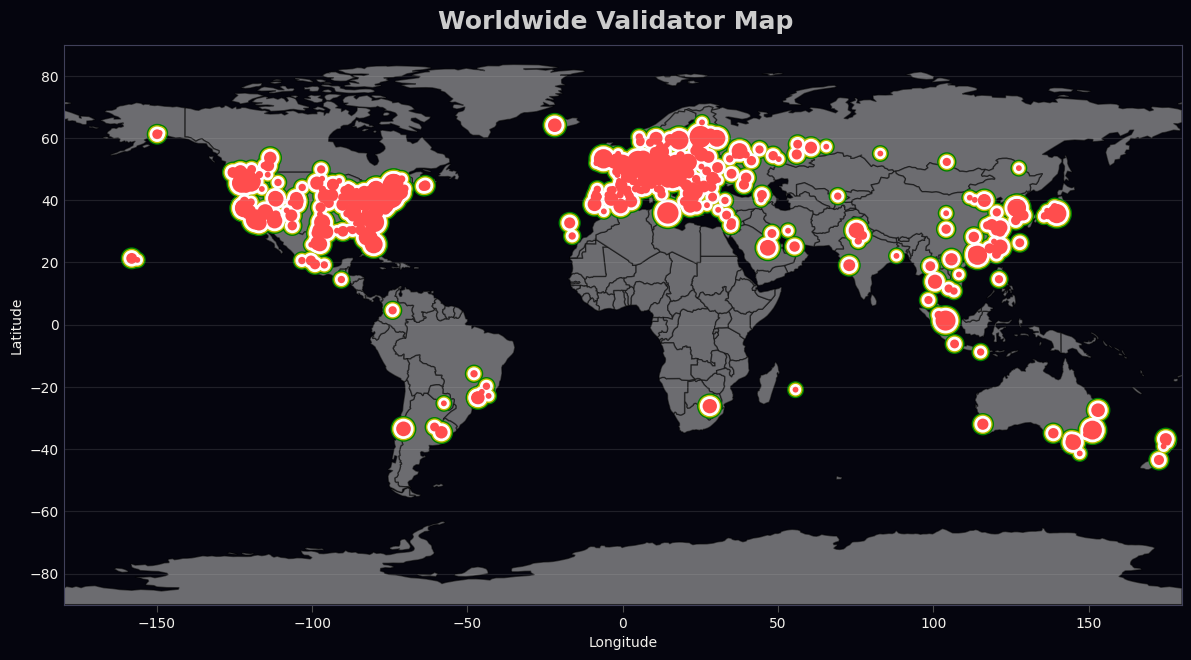

In [ ]:
fig, ax = set_plt_defaults(left = 0.07, right = 0.94, top = 0.91, bottom=0.11, figsize = (14, 7), grid_on=True)
suptitle_centered('Worldwide Validator Map')
plot_world()
plot_custom_scatter(tmp, s_mod=250)

plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('rig-map-world.png', dpi=150, transparent=False, facecolor=ax.get_facecolor())
plt.show()

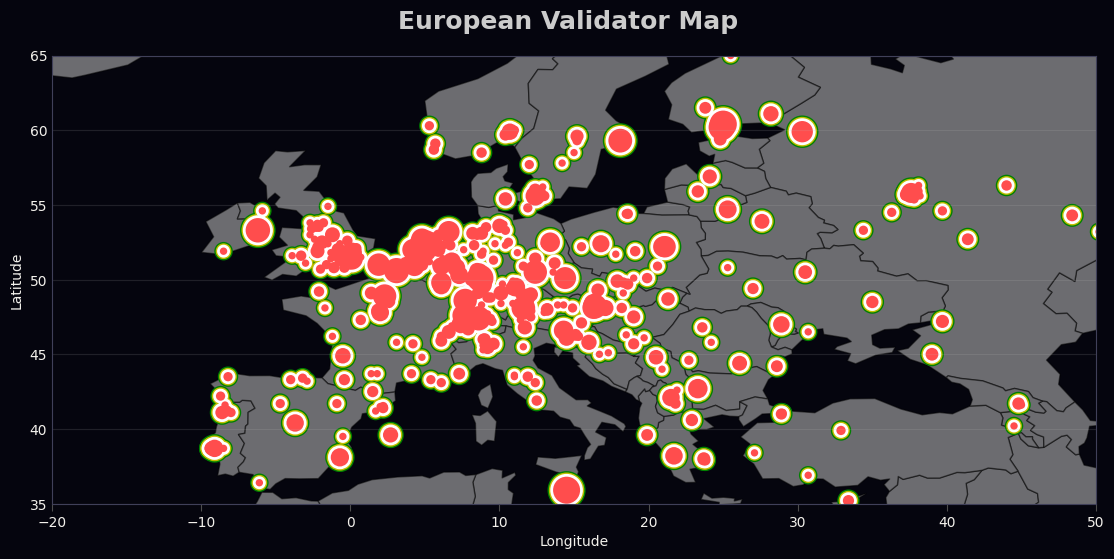

In [ ]:
fig, ax = set_plt_defaults(left = 0.07, right = 0.94, top = 1.1, bottom=-0.08, figsize = (12, 6), grid_on=True)
suptitle_centered('European Validator Map')
plot_world()
plot_custom_scatter(tmp, s_mod=400)

plt.xlim([-20, 50])
plt.ylim([35, 65])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('rig-map-europe.png', dpi=150, transparent=False, facecolor=ax.get_facecolor())
plt.show()

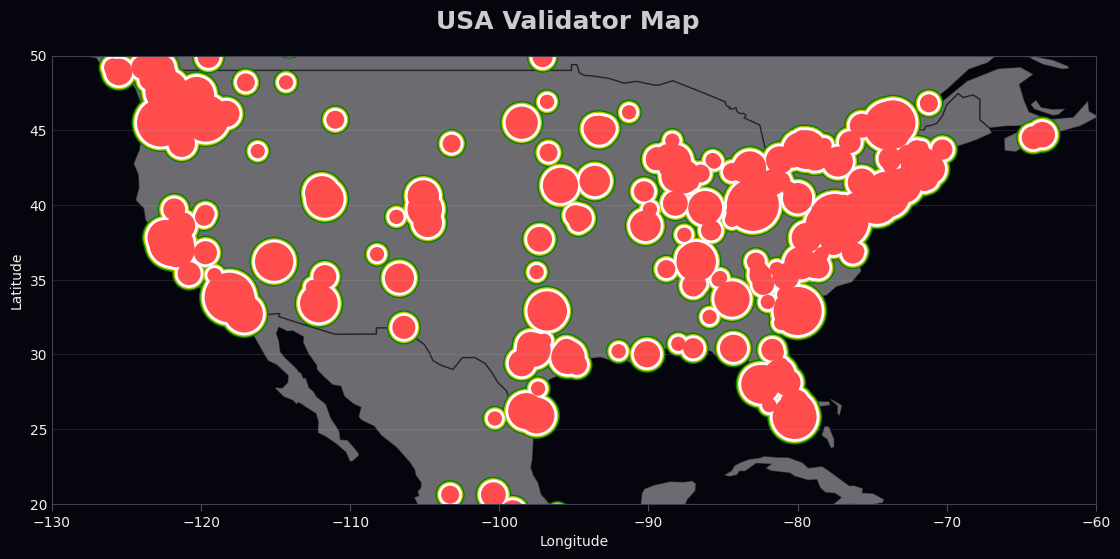

In [ ]:
fig, ax = set_plt_defaults(left = 0.07, right = 0.94, top = 1.1, bottom=-0.08, figsize = (12, 6), grid_on=True)
suptitle_centered('USA Validator Map')
plot_world()
plot_custom_scatter(tmp, s_mod=1500)

plt.xlim([-130, -60])
plt.ylim([20, 50])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('rig-map-usa.png', dpi=150, transparent=False, facecolor=ax.get_facecolor())
plt.show()